In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [63]:
df=pd.read_sas("bankloan.sas7bdat")

In [64]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    float64
 1   ed        850 non-null    float64
 2   employ    850 non-null    float64
 3   address   850 non-null    float64
 4   income    850 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 59.9 KB


In [66]:
sample=df[df["default"].isnull()]

In [67]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,NaN
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,NaN
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [68]:
df1=df[~df["default"].isnull()]

In [69]:
df1

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0
696,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0
697,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0
698,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0


In [70]:
df1.duplicated().sum()

np.int64(0)

In [71]:
df1.nunique()

age          37
ed            5
employ       32
address      31
income      114
debtinc     231
creddebt    698
othdebt     699
default       2
dtype: int64

In [72]:
df1["ed"].value_counts()

ed
1.0    372
2.0    198
3.0     87
4.0     38
5.0      5
Name: count, dtype: int64

In [73]:
df1["default"].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

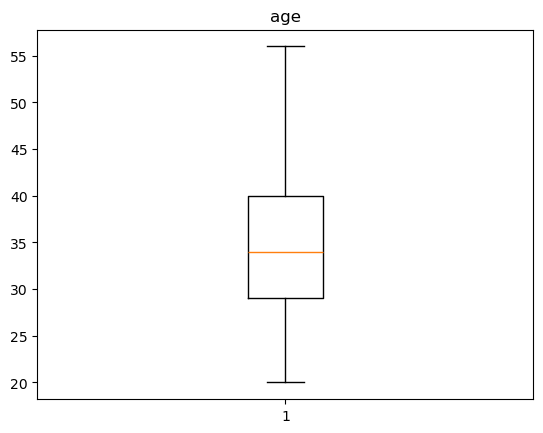

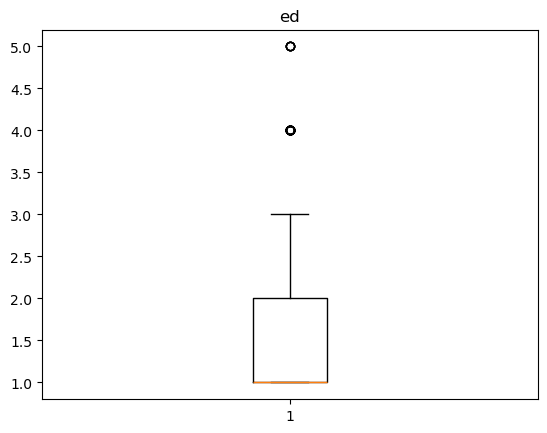

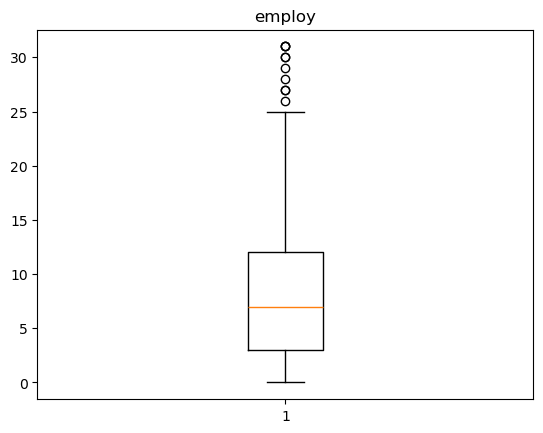

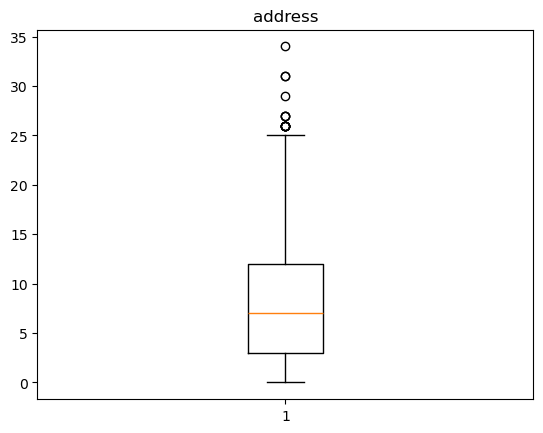

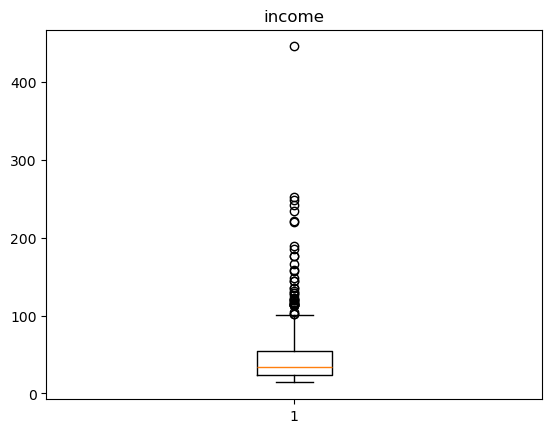

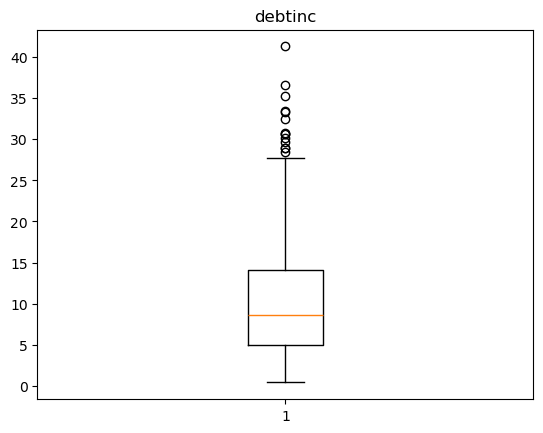

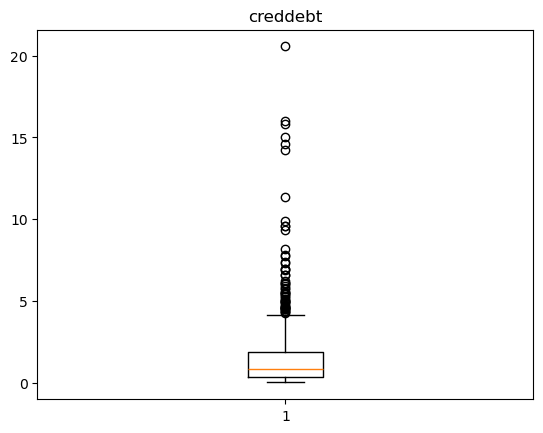

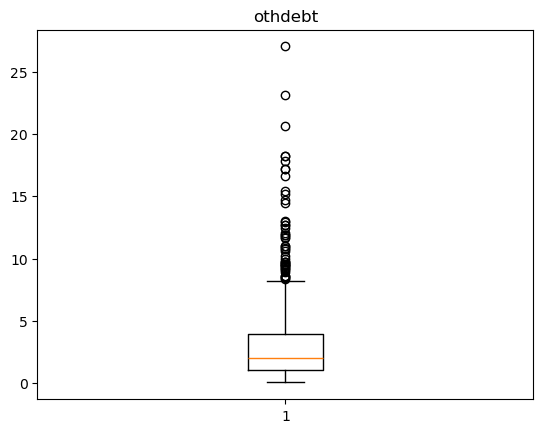

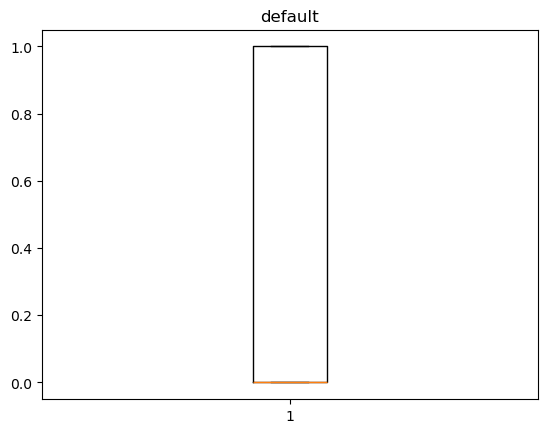

In [74]:
for i in df1.columns:
    plt.boxplot(df1[i])
    plt.title(i)
    plt.show()

In [75]:
df1["ed"].unique()

array([3., 1., 2., 4., 5.])

In [76]:
df1["ed"].value_counts().sort_values()

ed
5.0      5
4.0     38
3.0     87
2.0    198
1.0    372
Name: count, dtype: int64

In [77]:
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    df1[i]=np.where(df1[i]<lf,lf,df1[i])
    
    df1[i]=np.where(df1[i]>uf,uf,df1[i])

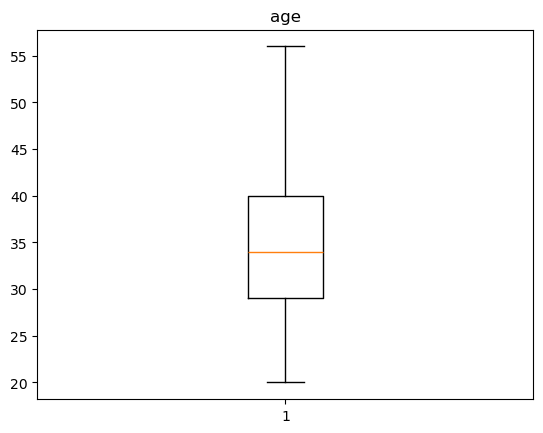

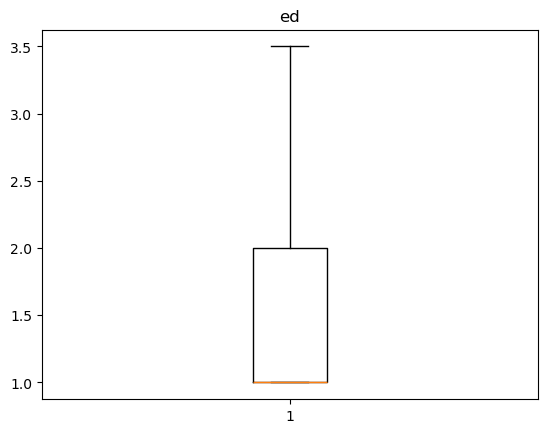

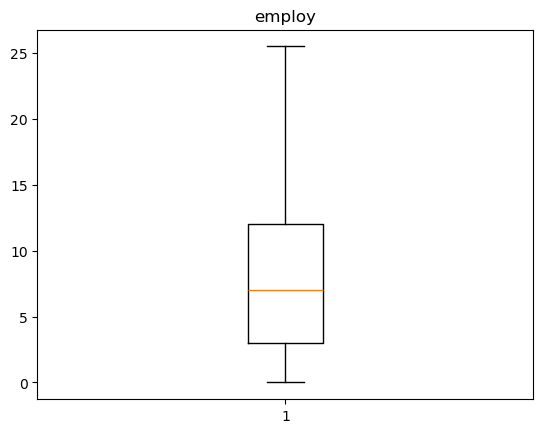

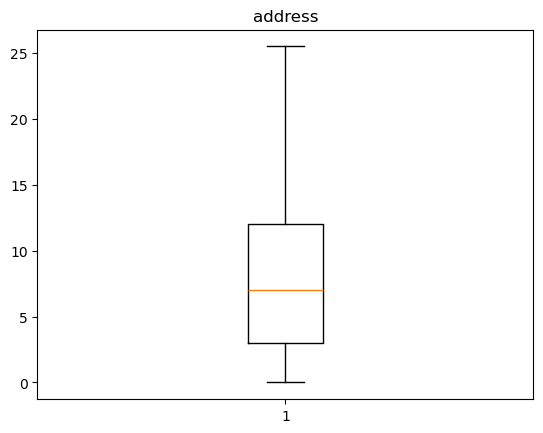

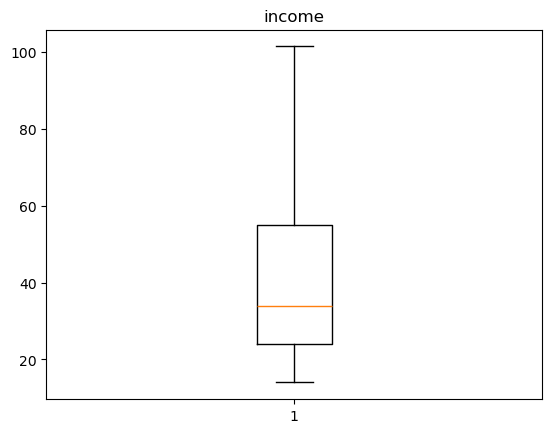

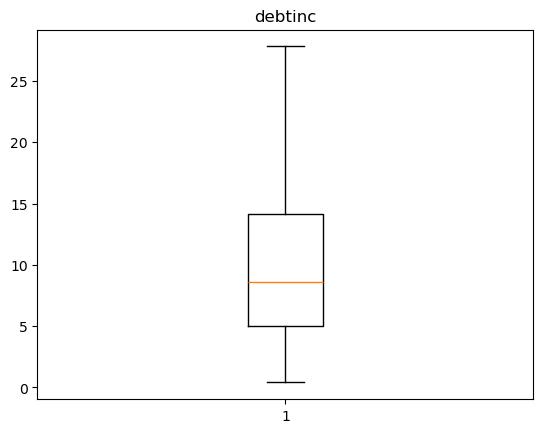

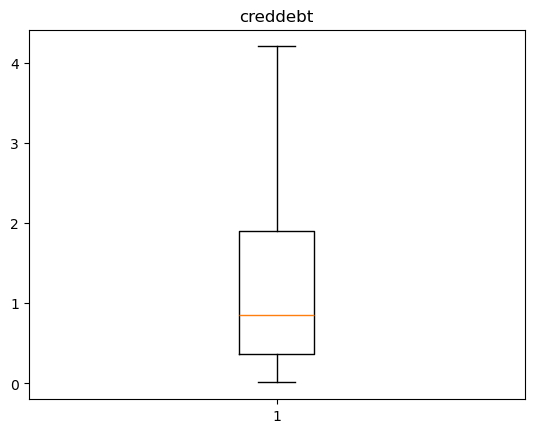

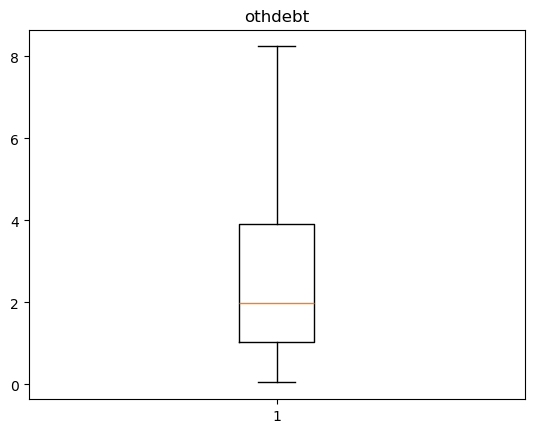

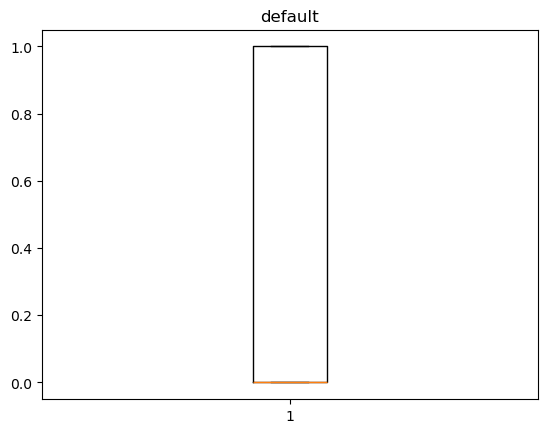

In [78]:
for i in df1.select_dtypes([float,int]).columns:
    plt.boxplot(df1[i])
    plt.title(i)
    plt.show()

In [86]:
x=df1.drop(columns=["default"])
y=df1["default"]

In [87]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [89]:
log.fit(x_train,y_train)

LogisticRegression()

In [92]:
print("Train accuracy", log.score(x_train,y_train))

Train accuracy 0.7857142857142857


In [93]:
print("Test accuracy", log.score(x_test,y_test))

Test accuracy 0.8642857142857143


In [95]:
sample.drop(columns="default",inplace=True)

In [96]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264
...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544


In [97]:
sample["pred_y"]=log.predict(sample)

In [98]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0.0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0.0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1.0
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0.0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0.0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0.0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0.0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0.0


In [99]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_train, log.predict(x_train)))
print("*****************************************************************")
print(classification_report(y_test, log.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       415
         1.0       0.64      0.39      0.49       145

    accuracy                           0.79       560
   macro avg       0.73      0.66      0.68       560
weighted avg       0.77      0.79      0.77       560

*****************************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       102
         1.0       0.88      0.58      0.70        38

    accuracy                           0.86       140
   macro avg       0.87      0.77      0.81       140
weighted avg       0.87      0.86      0.85       140



In [105]:
copy_df=x_train.copy()

In [111]:
pro_train=pd.DataFrame(log.predict_proba(copy_df),columns=["pro_0","pro_1"])

In [113]:
copy_df["pre_y"]=log.predict(copy_df)

In [114]:
copy_df["Mannual_y"]=np.where(pro_train["pro_1"]>0.5,1,0)

In [121]:
actual=y_train
pre=np.where(pro_train["pro_1"]>=0.3,1,0)

In [122]:
print(classification_report(actual,pre))

              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       415
         1.0       0.50      0.70      0.58       145

    accuracy                           0.74       560
   macro avg       0.69      0.73      0.70       560
weighted avg       0.78      0.74      0.75       560



In [123]:
copy_df["Mannual_y"]=np.where(pro_train["pro_1"]>0.3,1,0)

In [124]:
copy_df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y,Mannual_y
82,37.0,1.0,7.0,3.0,32.0,19.6,2.696960,3.575040,1.0,1
51,46.0,1.0,1.0,12.0,20.0,14.0,0.809200,1.990800,0.0,1
220,28.0,1.0,11.0,6.0,24.0,2.4,0.107136,0.468864,0.0,0
669,36.0,3.0,10.0,4.0,43.0,13.0,0.961480,4.628520,0.0,0
545,43.0,2.0,10.0,24.0,37.0,8.5,0.676175,2.468825,0.0,0
...,...,...,...,...,...,...,...,...,...,...
71,28.0,2.0,5.0,9.0,34.0,23.8,3.099236,4.992764,1.0,1
106,53.0,1.0,9.0,18.0,50.0,11.2,2.016000,3.584000,0.0,0
270,51.0,2.0,22.0,23.0,101.5,7.6,4.140480,4.979520,0.0,0
435,24.0,2.0,1.0,2.0,42.0,5.7,0.837900,1.556100,0.0,1


In [125]:
sample.drop(columns=["pred_y"],inplace=True)

In [128]:
pd.DataFrame(log.predict_proba(sample),columns=["pro_0","pro_1"])

,pro_0,pro_1
0,0.982945,0.017055
1,0.898531,0.101469
2,0.300705,0.699295
3,0.923709,0.076291
4,0.684102,0.315898
...,...,...
145,0.986684,0.013316
146,0.722663,0.277337
147,0.943579,0.056421
148,0.732189,0.267811


In [130]:
sam_pro=pd.DataFrame(log.predict_proba(sample),columns=["pro_0","pro_1"])

In [131]:
sample["pred_y"]=np.where(sam_pro["pro_1"]>=0.3,1,0)

In [132]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pred_y
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,1
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0


In [116]:
copy_df.sample(20)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y,Mannual_y
381,48.0,1.0,13.0,20.0,50.0,27.8125,4.201299,8.241395,0.0,0
461,21.0,2.0,0.0,2.0,21.0,12.5000,0.488250,2.136750,1.0,1
615,36.0,1.0,20.0,15.0,60.0,5.4000,1.056240,2.183760,0.0,0
569,54.0,1.0,18.0,25.5,101.5,8.5000,3.294600,6.395400,0.0,0
632,47.0,1.0,25.5,9.0,101.5,23.1000,4.201299,8.241395,0.0,0
577,49.0,2.0,22.0,4.0,79.0,7.3000,0.288350,5.478650,0.0,0
406,29.0,1.0,12.0,2.0,40.0,6.7000,1.632120,1.047880,0.0,0
345,30.0,1.0,0.0,8.0,19.0,16.6000,0.624492,2.529508,1.0,1
572,41.0,1.0,23.0,2.0,91.0,13.7000,0.573482,8.241395,0.0,0
635,41.0,1.0,24.0,15.0,100.0,11.5000,4.201299,6.440000,0.0,0


In [112]:
pro_train

,pro_0,pro_1
0,0.343221,0.656779
1,0.547245,0.452755
2,0.975072,0.024928
3,0.784783,0.215217
4,0.970094,0.029906
...,...,...
555,0.258373,0.741627
556,0.833794,0.166206
557,0.970492,0.029508
558,0.596266,0.403734


In [108]:
log.predict_proba(copy_df)

array([[0.34322109, 0.65677891],
       [0.54724529, 0.45275471],
       [0.97507174, 0.02492826],
       ...,
       [0.97049225, 0.02950775],
       [0.59626609, 0.40373391],
       [0.90813619, 0.09186381]])

In [106]:
log.predict(x_train)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.